<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB3_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:


# 한글 폰트 설정
# 나눔 바른 고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
print("한글 폰트 설정 완료")


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [29]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [30]:
train=pd.read_csv('/content/movies_train.csv')


In [31]:
train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


#2. EDA
**column: 제목, 배급사, 장르, 개봉일, 상영 시간, 상영 등급, 감독, dir_prev_bfnum, dir_prev_num, 스태프 수, 주연배우 수, 관객 수**

- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [33]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [34]:
train[train.dir_prev_num==0].head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [35]:
train[train.num_staff==0].head(5)
#관객 수 적음
#이전에 찍은 영화가 없는 경우가 다수

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
11,무서운 집,(주)콘텐츠 윙,공포,2015-07-30,98,12세 관람가,양병간,NaN,0,0,1,1079
22,원령,조이앤시네마,공포,2015-08-13,91,15세 관람가,동지견,NaN,0,0,1,914
27,러브앤서울 복숭아마을 도색소동기,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
75,원 오브 어 카인드 3D,골든타이드픽처스,뮤지컬,2013-10-31,93,전체 관람가,손석,NaN,0,0,1,8083


In [36]:
train.isna().sum()
#이전에 찍은 작품이 없는 경우에 관객수 측정 불가

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


In [37]:
train[train.dir_prev_bfnum.isna()].head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [38]:
train[train.dir_prev_bfnum.isna()].head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [39]:
train.dir_prev_bfnum.fillna(0, inplace=True)
train.dir_prev_bfnum.isna().sum()

np.int64(0)

In [40]:
train[train['box_off_num']==0]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num


In [41]:
train['release_time'].idxmax()

233

배급사 별 영화 수

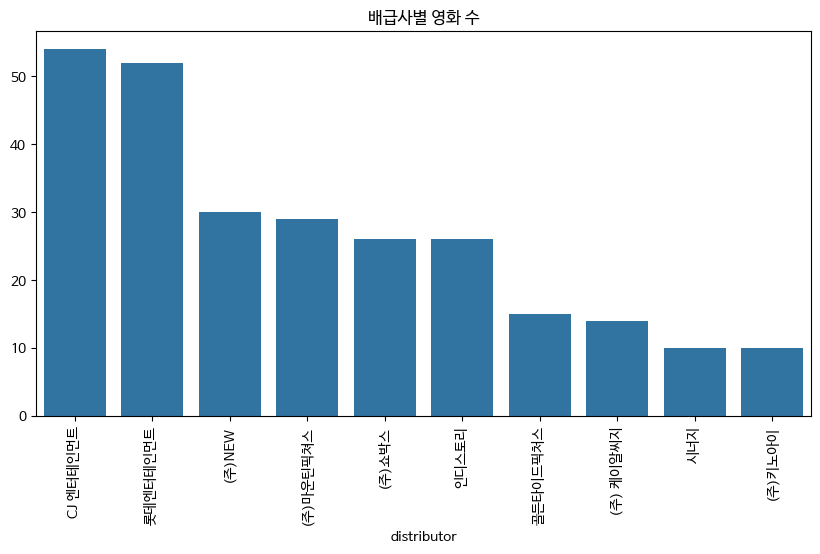

In [42]:
dist_count= train['distributor'].value_counts()
dist_count

plt.figure(figsize=(10,5))
sns.barplot(x=dist_count.index[:10], y=dist_count.values[:10])
plt.xticks(rotation=90)
plt.title("배급사별 영화 수")
plt.show()

#큰 배급사의 영화가 많음 - cj,롯데

장르 빈도수

- 드라마 매우 많음
- 생각보다 다큐 많음 (독립영화때문?)

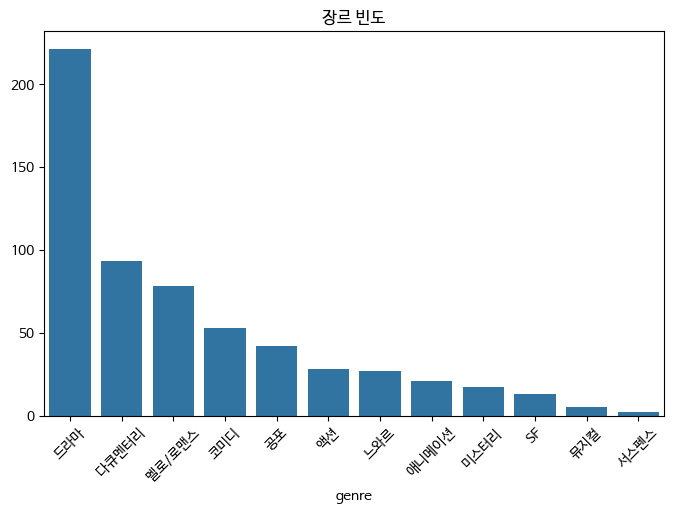

In [43]:
genre_count = train["genre"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=genre_count.index, y=genre_count.values)
plt.xticks(rotation=45)
plt.title("장르 빈도")
plt.show()

개봉일 최소, 최대일
- 2010년대 중 2015년까지의 영화 (생각보다 오래된..)

In [44]:
train["release_time"] = pd.to_datetime(train["release_time"])
print("최소 개봉일:", train["release_time"].min())
print("최대 개봉일:", train["release_time"].max())

최소 개봉일: 2010-01-02 00:00:00
최대 개봉일: 2015-12-31 00:00:00


등급별 영화 수
- 청불과 15세 이상이 많음 -> 영화의 주 타깃층?

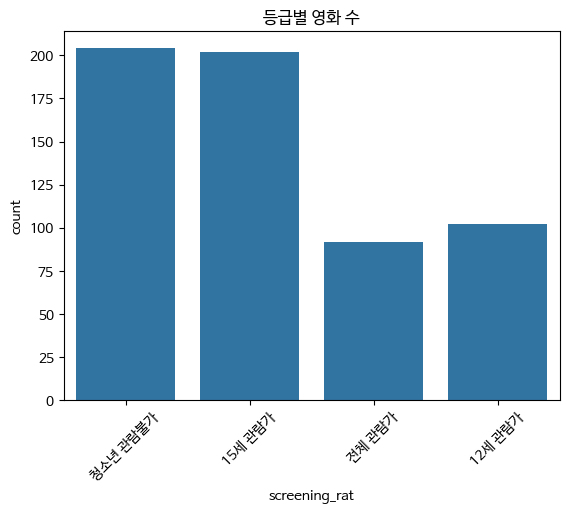

In [45]:
sns.countplot(x="screening_rat", data=train)
plt.title("등급별 영화 수")
plt.xticks(rotation=45)
plt.show()

이전 평균 관객 수 -히스토그램
- 중앙값 약 47만
- 3사분위 약 128만
- 현재 120만 근처에 많이 몰려있음


count    6.000000e+02
mean     4.726993e+05
std      1.309474e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.761416e+05
max      1.761531e+07
Name: dir_prev_bfnum, dtype: float64
[0.00000000e+00 1.16160250e+06 2.20775250e+05 2.38940000e+04
 1.00000000e+00 8.37969000e+05 7.39522000e+05 4.31231000e+05
 5.34232500e+05 8.22334200e+06 7.73000000e+02 4.95068500e+05
 7.57400000e+04 6.83213333e+05 8.05250000e+03 4.59898500e+06
 9.84000000e+02 1.15995400e+06 6.95201500e+05 5.83770000e+05]


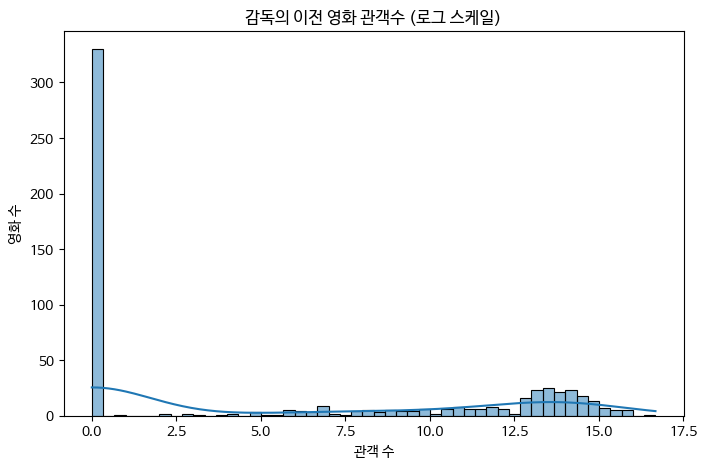

In [46]:
print(train["dir_prev_bfnum"].describe())
print(train["dir_prev_bfnum"].unique()[:20])  # 앞 20개 고유값

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(train["dir_prev_bfnum"]), bins=50, kde=True)
plt.title("감독의 이전 영화 관객수 (로그 스케일)")
plt.xlabel("관객 수")
plt.ylabel("영화 수")
plt.show()



이전 관객 평균 수가 높은 감독 10명

In [47]:
train.sort_values("dir_prev_bfnum", ascending=False)[["director","dir_prev_bfnum"]].head(10)


,director,dir_prev_bfnum
338,고구마,17615314.0
214,김민석,8801639.0
16,강형철,8223342.0
118,심형래,7855474.0
409,강형철,7838528.5
326,장재현,6720926.5
434,김용화,6081480.0
76,정우철,5849451.0
498,최동훈,5169479.0
477,나홍진,5046096.0


이전 평균 관객 수 vs 이번 영화 관객 수
- 낮은 관객 수는 잘 모르겠지만 이전에 관객 수가 많은 경우에는 이번 영화도 높은 경우가 많다

                dir_prev_bfnum  box_off_num
dir_prev_bfnum        1.000000     0.293791
box_off_num           0.293791     1.000000


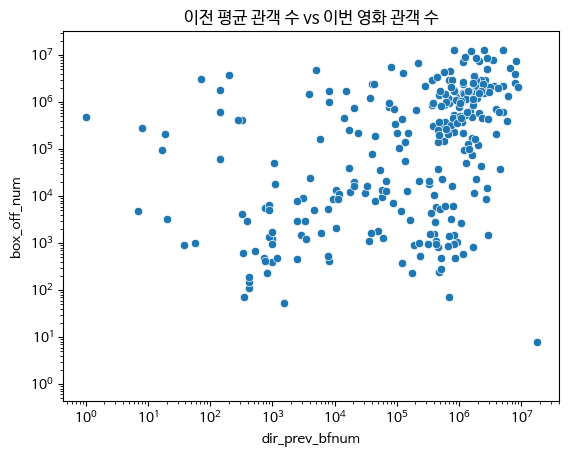

In [48]:
corr = train[["dir_prev_bfnum", "box_off_num"]].corr()
print(corr)

sns.scatterplot(x="dir_prev_bfnum", y="box_off_num", data=train)
plt.xscale("log")
plt.yscale("log")
plt.title("이전 평균 관객 수 vs 이번 영화 관객 수")
plt.show()

장르 vs 상영 등급
- 드라마는 주류 장르이기에 많은 영화의 등급인 15세와 청불에 많음
- 다큐멘터리는 전체 관람가가 많음
- 청불은 멜로

뻔한 ..?

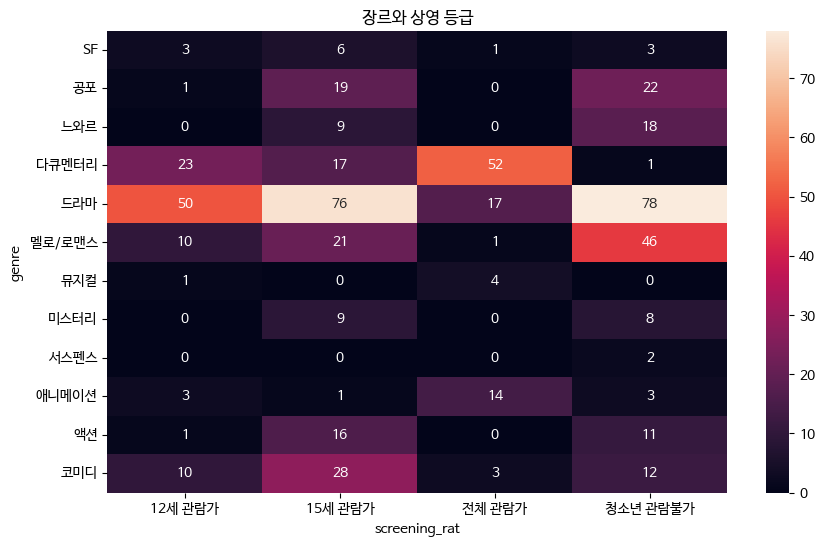

In [49]:
pivot = pd.crosstab(train["genre"], train["screening_rat"])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt="d")
plt.title("장르와 상영 등급")
plt.show()

상영시간과 개봉일(월별) 산점도
- 큰 관계 없어보임

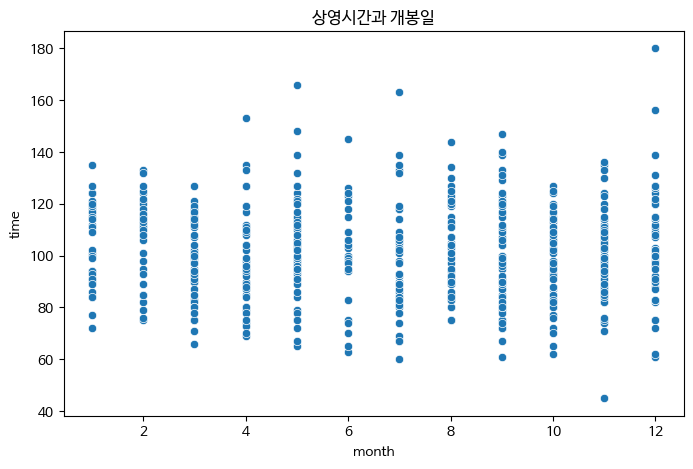

In [50]:
train["month"] = train["release_time"].dt.month

plt.figure(figsize=(8,5))
sns.scatterplot(x="month", y="time", data=train)
plt.title("상영시간과 개봉일")
plt.show()

이전 평균 관객수와 이번 관객수가 2배 차이나는 경우
- 1~3 은 이번 영화가 성공함
- 불량 남녀는 이전 관객수가 1 -> 이상점
- 강철대오는 낮아진 관객수 -> 이유 분석?

In [51]:
subset = train[(train["dir_prev_bfnum"] > 0) &
               ((train["box_off_num"] >= 2*train["dir_prev_bfnum"]) |
                (train["box_off_num"]*2 <= train["dir_prev_bfnum"]))]
print(subset[["title","dir_prev_bfnum","box_off_num"]].head())

            title  dir_prev_bfnum  box_off_num
1            내부자들      1161602.50      7072501
2       은밀하게 위대하게       220775.25      6959083
3        나는 공무원이다        23894.00       217866
4            불량남녀            1.00       483387
5  강철대오 : 구국의 철가방       837969.00       233211


배우 규모와 상영시간
- 큰 관련 없어보이지만 배우가 1명인 경우에 비해 2명 이상인 경우가 상영시간이 길어짐

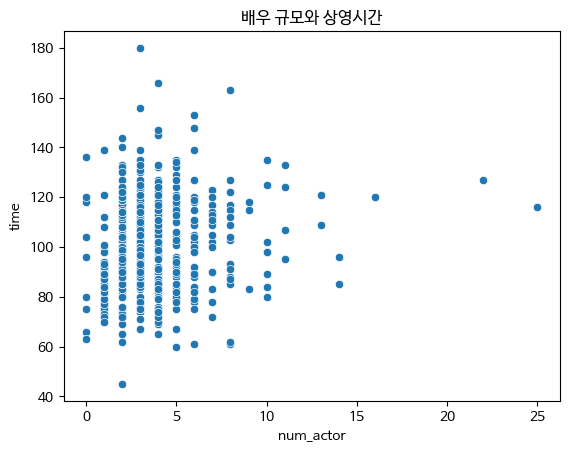

In [52]:
sns.scatterplot(x="num_actor", y="time", data=train)
plt.title("배우 규모와 상영시간")
plt.show()

살펴보고 싶은 EDA
- 배급사 별 영화 수
- 장르 빈도수
- 개봉일 최소, 최대일
- 등급별 영화 수
- 이전 평균 관객 수 히스토그램
- 이전에 참여한 영화 개수 최소, 최대
- 이전 평균 관객 수와 관객 수의 상관관계
- 장르와 상영등급-> 히트맵
- 상영시간과 개봉일 (달별로) - 산점도
- 이전 관객수와 이번 영화 관객수가 2배 차이나는 경우
- 배우 규모와 상영시간

#**가설과 시각화**
##가설 1. 이전 영화 평균 관객수가 많으면 이번 영화 관객 수도 많을 것이다.
- 변수 : 이전 영화 평균 관객수(dir_prev_bfnum)와 관객 수(box_off_num)

<Axes: xlabel='dir_prev_bfnum', ylabel='Count'>

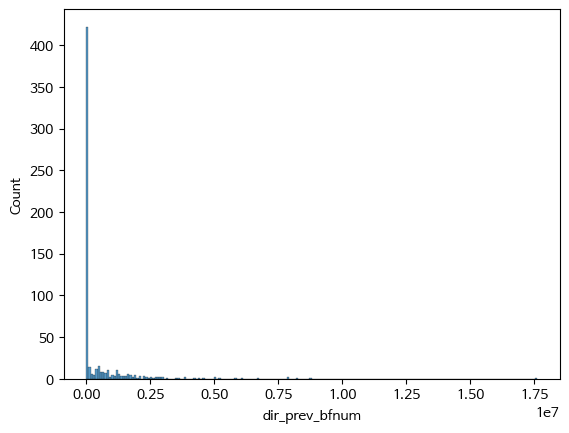

In [53]:

sns.histplot(train['dir_prev_bfnum'])

간단하게 이전 영화의 평균 관객수 히스토그램을 살펴보면 낮은 수에 빈도수가 몰려있음.

<Axes: xlabel='box_off_num', ylabel='Count'>

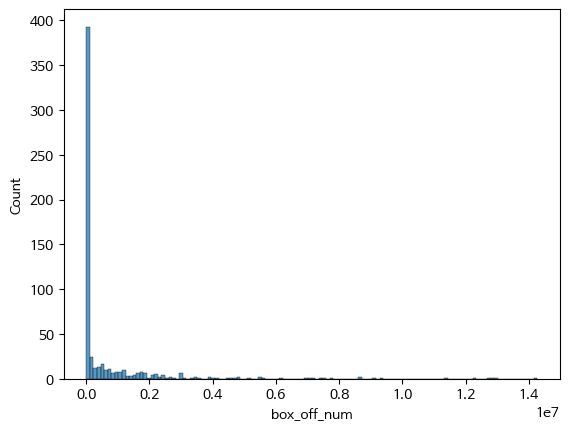

In [54]:
sns.histplot(train['box_off_num'])

현재 영화의 관객 수를 살펴보면 높은 관객수보다 낮은 관객 수의 빈도가 더 높은 것을 알 수 있다.


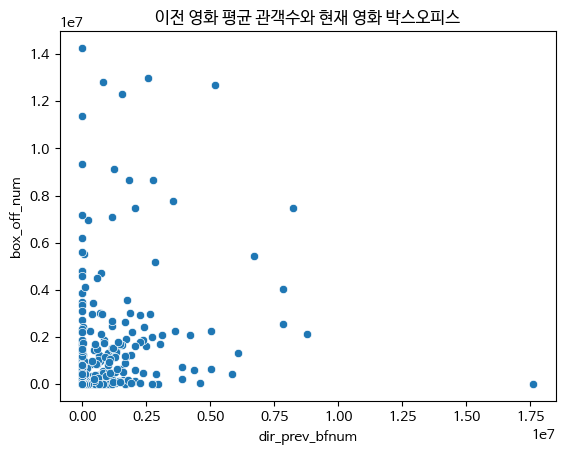

In [55]:
sns.scatterplot(x='dir_prev_bfnum', y='box_off_num', data=train)
plt.title('이전 영화 평균 관객수와 현재 영화 박스오피스')
plt.show()


두 변수의 산점도를 그려보면 정규화처리가 되어있어서 이전 영화 평균 관객 수는 0.0에서 0.25 사이, 현재 영화 관객수는 0.0에서 0.4사이에 몰려있는 것을 확인할 수 있고 두 변수 사이 관계를 보기가 어렵다.

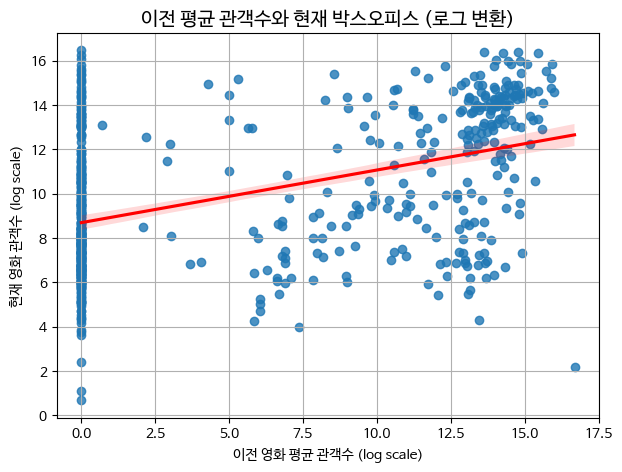

In [56]:
train["box_log"] = np.log1p(train["box_off_num"])
train["dir_prev_log"] = np.log1p(train["dir_prev_bfnum"])

plt.figure(figsize=(7,5))
sns.regplot(x="dir_prev_log", y="box_log", data=train, line_kws={'color':'red'})
plt.title("이전 평균 관객수와 현재 박스오피스 (로그 변환)", fontsize=14)
plt.xlabel("이전 영화 평균 관객수 (log scale)")
plt.ylabel("현재 영화 관객수 (log scale)")
plt.grid(True)
plt.show()

###그래프 해석
1. 상관관계
   - 선 그래프가 양의 기울기로 산점도들의 경향을 나타낸다.
   - 오른쪽에 점이 몰려있는 것을 보아, 이전 영화 평균 관객수가 높은 경우에 현재 영화 관객수가 높다는 것을 알 수 있다.  
2. 이상점
   - 이전 영화의 평균 관객수가 0 인 경우 다수 존재 -> 이전의 작품이 없는 경우이다. 그럼에도 불구하고 현재 관객 수가 매우 다양하게 분포한다.
   - 이전 영화의 평균 관객 수가 매우 큰 경우임에도 현재 영화의 관객 수 가 매우 낮은 경우 존재한다. (왼쪽 끝 아래)
3. 가설 타당성
   - 전체적으로 양의 상관관계를 가지므로 이전 영화의 평균 관객수가 많을수록 현재 관객수가 많다는 가설을 뒷받침한다.


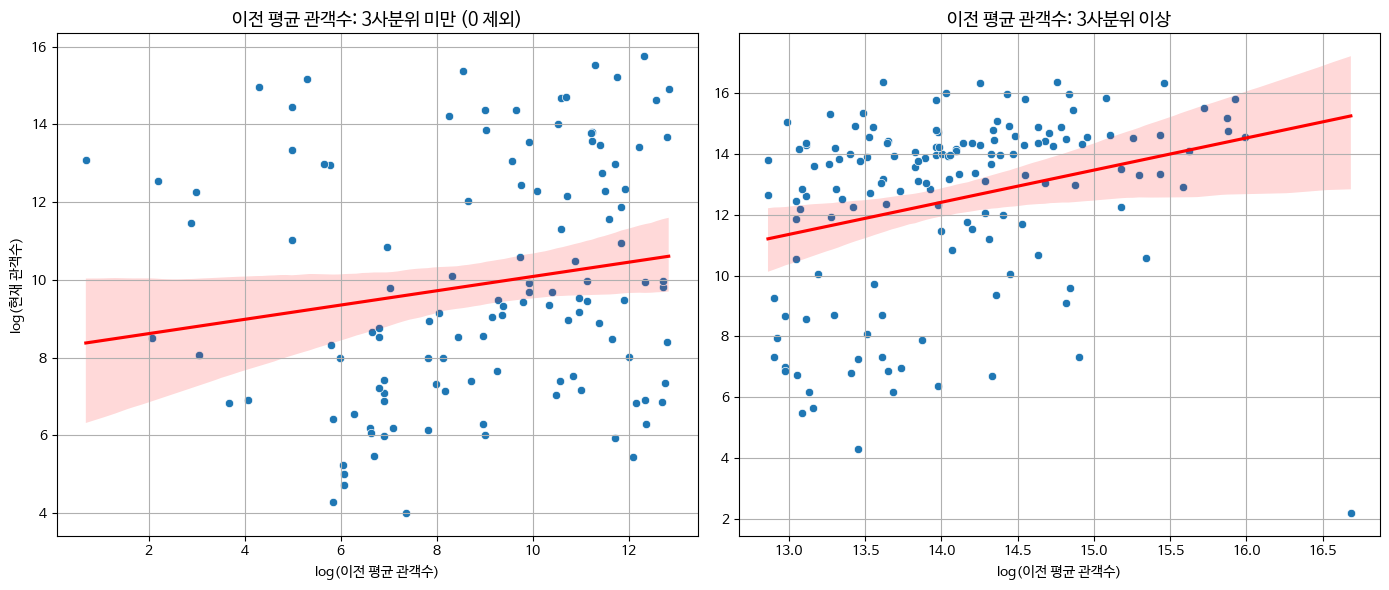

In [57]:
# 사분위수 구하기
q3 = train["dir_prev_bfnum"].quantile(0.75)

# 두 집단 나누기
low_group = train[(train["dir_prev_bfnum"] > 0) & (train["dir_prev_bfnum"] < q3)].copy()
high_group = train[train["dir_prev_bfnum"] >= q3].copy()

# 로그 변환 (왜곡 줄이기)
low_group["box_log"] = np.log1p(low_group["box_off_num"])
low_group["dir_prev_log"] = np.log1p(low_group["dir_prev_bfnum"])
high_group["box_log"] = np.log1p(high_group["box_off_num"])
high_group["dir_prev_log"] = np.log1p(high_group["dir_prev_bfnum"])

# 2개의 그래프 나란히 그리기
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# 3사분위 미만
sns.scatterplot(x="dir_prev_log", y="box_log", data=low_group, ax=axes[0])
sns.regplot(x="dir_prev_log", y="box_log", data=low_group, ax=axes[0], scatter=False, color="red")
axes[0].set_title("이전 평균 관객수: 3사분위 미만 (0 제외)", fontsize=13)
axes[0].set_xlabel("log(이전 평균 관객수)")
axes[0].set_ylabel("log(현재 관객수)")
axes[0].grid(True)

# 3사분위 이상
sns.scatterplot(x="dir_prev_log", y="box_log", data=high_group, ax=axes[1])
sns.regplot(x="dir_prev_log", y="box_log", data=high_group, ax=axes[1], scatter=False, color="red")
axes[1].set_title("이전 평균 관객수: 3사분위 이상", fontsize=13)
axes[1].set_xlabel("log(이전 평균 관객수)")
axes[1].set_ylabel("")

axes[1].grid(True)

plt.tight_layout()
plt.show()

###그래프 해석
1. 상관관계 차이 비교
   - 이전 평균 관객수가 3사분위 미만인 경우는 3사분위 이상인 경우(많은 관객들이 찾은 영화)보다 현재 관객 수와 낮은 양의 상관관계를 보인다.
2. 이상점
   - 왼쪽 그래프는 선 그래프로부터 떨어진 이상점들이 많이 보인다. 즉 상관 관계를 크게 갖지 않는다. 또한 이전 관객수가 적었더라도 현재 관객 수가 매우 높은 경우도 발견된다.
   - 오른쪽 그래프는 선 그래프 위쪽에 점들이 다수 분포한 것으로 보아 이전 평균 관객수가 클수록 두 변수가 양의 상관관계를 가진다는 것을 알 수 있다.
3. 가설 타당성
   - 이전 평균 관객수 크기에 따라 상관관계가 다르기 때문에 항상 가설이 타당하다고 보기는 어렵다.

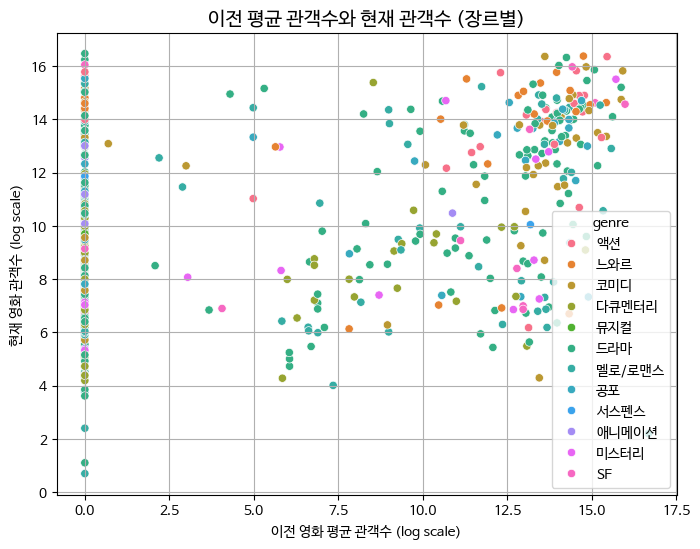

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="dir_prev_log", y="box_log", hue="genre", data=train)
plt.title("이전 평균 관객수와 현재 관객수 (장르별)", fontsize=14)
plt.xlabel("이전 영화 평균 관객수 (log scale)")
plt.ylabel("현재 영화 관객수 (log scale)")
plt.grid(True)
plt.show()

장르별로 두 변수의 상관관계가 다를지 살펴보았는데, 규칙성을 발견하지 못함.

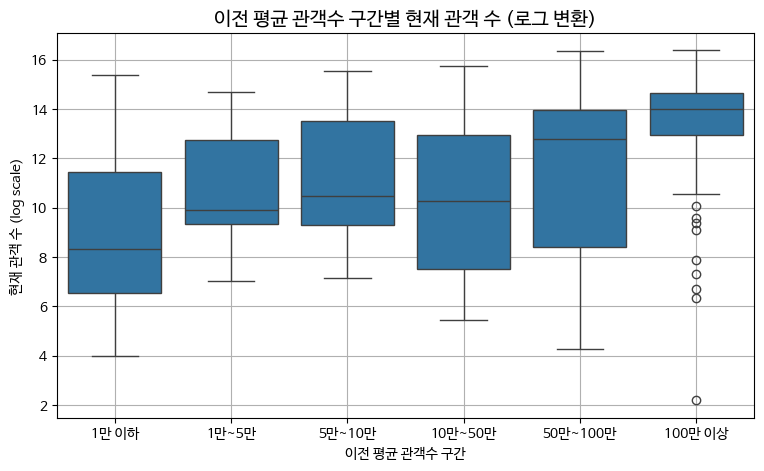

In [59]:
bins = [0, 1e4, 5e4, 1e5, 5e5, 1e6, train["dir_prev_bfnum"].max()]
labels = ["1만 이하","1만~5만","5만~10만","10만~50만","50만~100만","100만 이상"]
train["dir_prev_bin"] = pd.cut(train["dir_prev_bfnum"], bins=bins, labels=labels)

plt.figure(figsize=(9,5))
sns.boxplot(x="dir_prev_bin", y="box_log", data=train)
plt.title("이전 평균 관객수 구간별 현재 관객 수 (로그 변환)", fontsize=14)
plt.xlabel("이전 평균 관객수 구간")
plt.ylabel("현재 관객 수 (log scale)")
plt.grid(True)
plt.show()

###이전 평균 관객수를 구간으로 나누어 현재 관객 수의 분포 확인
1. 중앙값 비교
   - 이전 평균 관객수가 1만 이하인 경우 가장 낮은 중앙값 분포를 보였다. 즉, 이전 관객수가 낮을수록 현재 관객수가 낮다는 것을 알 수 있다.
   - 1만~50만의 평균 관객수 구간의 경우 비슷한 중앙값 분포를 가진다.
   - 50만 이상의 경우, 특히 100만이 넘어갈수록 중앙값이 매우 커진다. 즉, 감독의 이전 영화들을 많은 관객들이 봤다면 현재 영화의 관객수도 많다.
2. 이상점
   - 100만 이상 구간에서 이상점을 발견할 수 있다. 즉 이전 영화의 평균 관객수가 매우 높았어도 현재 관객수가 낮은 경우이다.
3. 가설 타당성
   - 이전 평균 관객수가 50만 이상의 높은 경우일수록 현재 관객수에 높은 영향을 끼치는 것을 알 수 있다. 그러나 모든 구간에서 양적 관계를 갖는다고 보긴 어렵다.

In [60]:
import statsmodels.api as sm
X = train["dir_prev_log"]
y = train["box_log"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                box_log   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     149.8
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           6.82e-31
Time:                        06:22:11   Log-Likelihood:                -1502.9
No. Observations:                 600   AIC:                             3010.
Df Residuals:                     598   BIC:                             3019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.6933      0.159     54.708   

- 단순선형 회귀로 이전 평균 관객수가 현재 관객 수에 미치는 영향 분석
< R-squared >
- 값 = 0.2

    -> dir_prev_log(이전 영화 평균 관객수 로그변환) 이 box_log(현재 영화 관객수 로그변환)의 변동성을 20% 설명가능하다.
    -> 나머지 80%의 변동성은 다른 요인들에 의해 결정된다.

< P-value >
- 값 = 0.000
    
    -> 0.05보다 작기 때문에 이전 영화 관객수가 현재 관객수에 미치는 영향이 유의미하다.

< 회귀계수 >
- dir_prev_log의 계수 : 0.2372
    
    -> 이전 평균 관객 수가 1%이 증가할때 현재 관객 수가 약 0.23% 증가한다.

< 최종 결론 >
- 이전 평균 관객수와 현재 관객수 사이에 양의 상관관계가 있고 통계적으로 유의미하지만, R-squared 값이 작고 단위당 증가율이 낮기 때문에 이전 평균 관객수가 큰 영향력을 갖는다고 보기 어렵다. 가설 기각.

#가설2. 개봉일이 상영하는 장르에 영향을 줄 것이다.
- 변수: 개봉일(release_time)과 장르(genre)

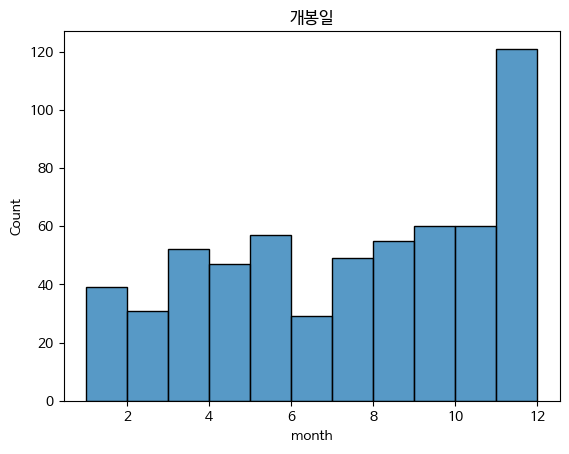

In [61]:
train["release_time"] = pd.to_datetime(train["release_time"])
train["month"] = train["release_time"].dt.month

sns.histplot(train["month"])
plt.title("개봉일")
plt.show()

달 별로 영화 개수를 살펴보니 연말에 개봉하는 영화 수가 다른 수에 비해 2배 이상으로 많다.

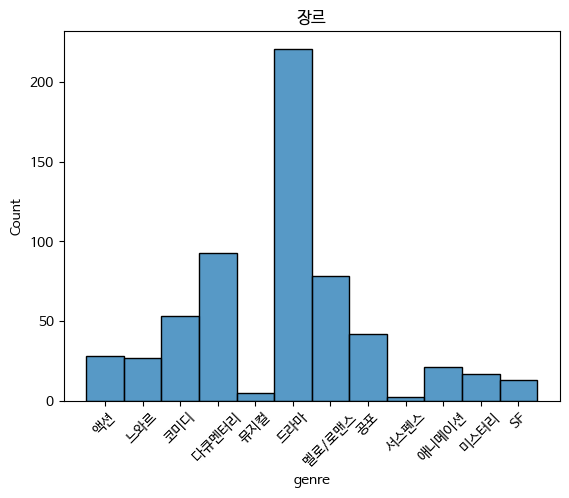

In [62]:
sns.histplot(train["genre"])
plt.title("장르")
plt.xticks(rotation=45)
plt.show()

영화의 장르는 드라마가 타 장르에 비해 2배 이상으로 많고 다큐멘터리, 멜로랑 로맨스가 그 다음으로 많다.

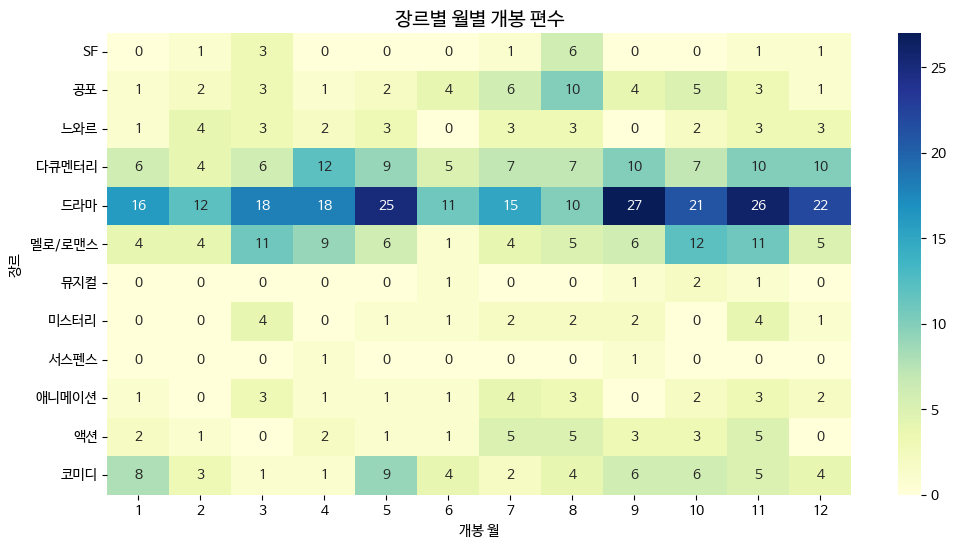

In [63]:
genre_month = pd.crosstab(train["genre"], train["month"])

plt.figure(figsize=(12,6))
sns.heatmap(genre_month, cmap="YlGnBu", annot=True, fmt="d")
plt.title("장르별 월별 개봉 편수", fontsize=14)
plt.xlabel("개봉 월")
plt.ylabel("장르")
plt.show()

1. 그래프 해석
   - 전체적으로 드라마 장르의 비율이 높으며 드라마 장르는 5월, 9월, 11월에 많이 개봉한다.
   - 공포 장르는 8월에 상대적으로 많이 개봉한다.
   - 멜로. 로맨스 장르는 3월, 10월에 상대적으로 개봉 비율이 높다.
   - 코미디 장르는 1월과 5월에 상대적으로 개봉 비율이 높다.

2. 가설 타당성
   - 장르마다 월별로 개봉 빈도가 높은 경우가 있다. (공포, 멜로 로맨스, 드라마) 하지만 모든 장르가 개봉일에 따라 영향을 받는 것은 아니므로 항상 가설이 타당하다고 보기 어렵다.

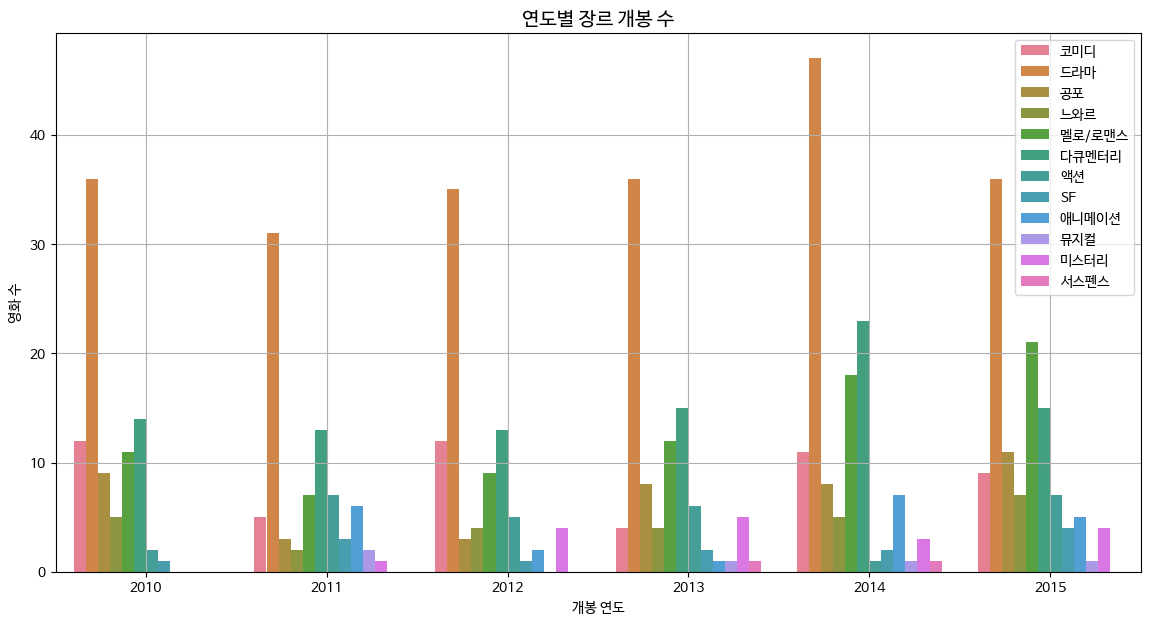

In [64]:
train["year"] = train["release_time"].dt.year

plt.figure(figsize=(14,7))
sns.countplot(x="year", hue="genre", data=train)
plt.title("연도별 장르 개봉 수", fontsize=14)
plt.xlabel("개봉 연도")
plt.ylabel("영화 수")
plt.legend(bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

###해마다 개봉하는 장르의 빈도 변화 확인
1. 그래프 해석
   - 전체적으로 2014년도에 개봉하는 영화 수가 많았고, 특히 드라마, 멜로와 다큐멘터리 장르 수가 다른 해에 비해 많았다.
   - 코미디 장르는 2011, 2013년에 개봉한 수가 다른 해에 비해 적다.
   - 2015년도에는 개봉한 멜로. 로맨스 장르 수가 다큐멘터리 장르 수를 넘었다.
2. 가설 타당성
   - 해마다 특히 더 개봉하는 장르가 있긴 하지만(코미디) 해에 따라 특정 장르보단 전체적으로 영화의 개봉 수가 늘어나는 영향이 더 크다. 가설을 뒷받침하지 못한다고 볼 수 있다.

year
2010     90
2011     80
2012     88
2013     95
2014    127
2015    120
Name: title, dtype: int64


<Axes: title={'center': '연도별 영화 개봉 수'}, xlabel='year'>

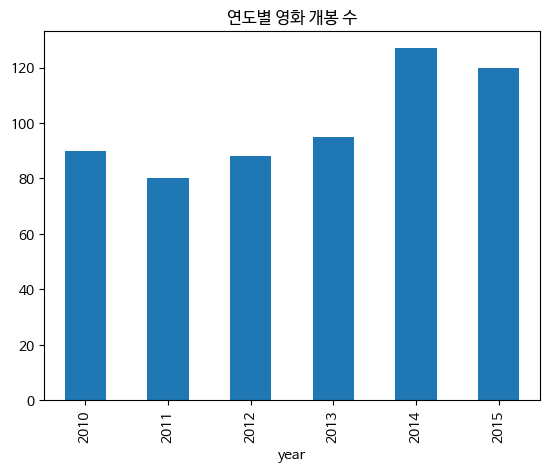

In [65]:
#연도별 영화 개봉 수 확인
year_count = train.groupby("year")["title"].count()
print(year_count)
year_count.plot(kind="bar", title="연도별 영화 개봉 수")

실제로 2014년도의 영화 개봉 수가 많았다.

In [66]:
#2014년도에 개봉한 영화의 장르
genre_by_year = train.groupby(["year", "genre"])["title"].count().reset_index()
genre_2014 = genre_by_year[genre_by_year["year"] == 2014]
print(genre_2014.sort_values("title", ascending=False))

    year   genre  title
45  2014     드라마     47
44  2014   다큐멘터리     23
46  2014  멜로/로맨스     18
52  2014     코미디     11
42  2014      공포      8
50  2014   애니메이션      7
43  2014     느와르      5
48  2014    미스터리      3
41  2014      SF      2
47  2014     뮤지컬      1
49  2014    서스펜스      1
51  2014      액션      1


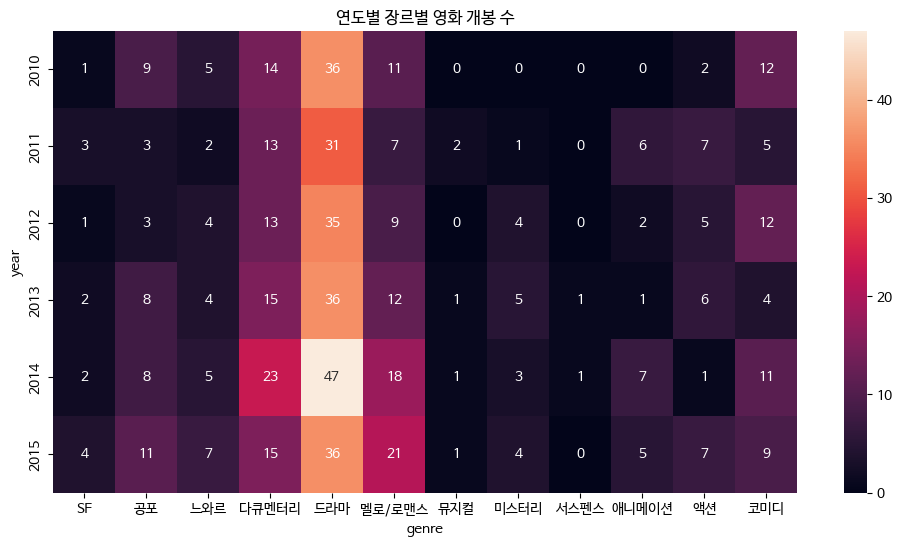

In [67]:
plt.figure(figsize=(12,6))
genre_pivot = genre_by_year.pivot(index="year", columns="genre", values="title").fillna(0)
sns.heatmap(genre_pivot, annot=True, fmt=".0f")
plt.title("연도별 장르별 영화 개봉 수")
plt.show()

히트맵을 이용해 년도별 장르의 빈도율 살펴보기
1. 그래프 해석
   - 2014년에 다큐, 드라마, 멜로 세 장르의 빈도가 높아졌다.
   - 멜로는 2015년에도 높은 빈도를 나타냈다.
   - 2012년에 상대적으로 적은 수의 영화가 개봉했다.
2. 가설 타당성
   - 개봉하는 해에 따라서 영화 장르에 영향을 미친다고 보기는 어렵다.

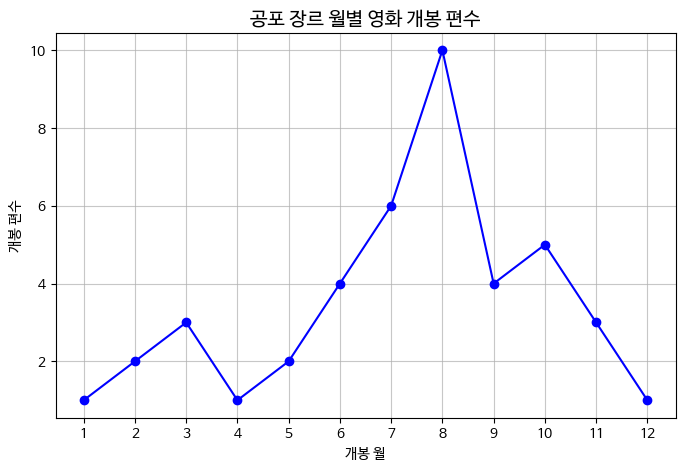

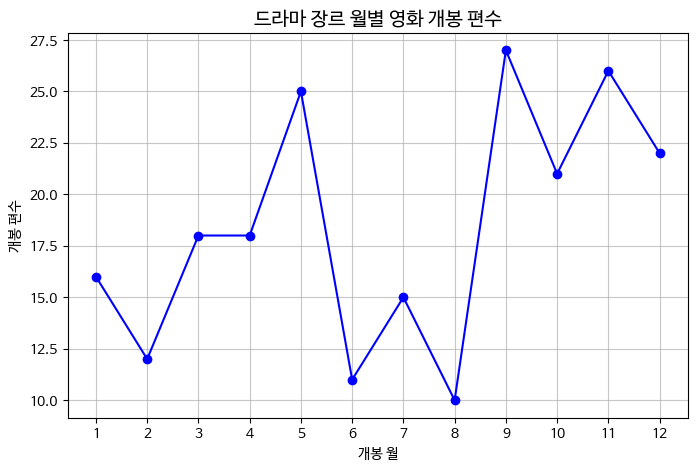

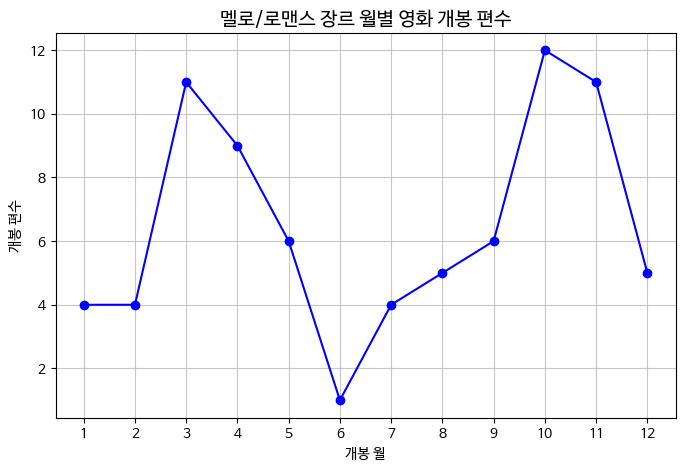

In [68]:
genres = ["공포", "드라마", "멜로/로맨스"]

for g in genres:
    subset = train[train["genre"] == g]
    month_count = subset.groupby("month")["title"].count().reset_index()

    plt.figure(figsize=(8,5))
    plt.plot(month_count["month"], month_count["title"], marker="o", color="blue")
    plt.title(f"{g} 장르 월별 영화 개봉 편수", fontsize=14)
    plt.xlabel("개봉 월")
    plt.ylabel("개봉 편수")
    plt.xticks(range(1,13))
    plt.grid(True, alpha=0.7)
    plt.show()

1. 그래프 해석
   - 공포 영화는 상대적으로 여름 시즌(8월)에 개봉하는 수가 많다.
   - 드라마 장르는 5, 9, 11월에 개봉하는 수가 많다. 이를 통해 가정의 달인 5월과 연말 시즌에 가족단위의 관객을 대상으로 하거나 드라마 장르와 어울리는 시기에 개봉을 한다고 해석할 수 있다.
   - 멜로.로맨스 장르는 3, 10, 11월에 개봉하는 수가 많다. 이를 통해 봄 시즌과 연말 시즌을 대상으로 개봉한다고 해석할 수 있다.
2. 가설 타당성
   - 달 별로 공포, 드라마, 멜로 장르의 영화 개봉수가 변화하고 특정 달에 어울리는 장르의 영화를 더 많이 개봉한다는 것을 알 수 있다. 그러므로 위 장르들은 가설에 타당한 뒷받침이 된다.